In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


In [7]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [8]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06
mean,1.533973e+07,3.839137e+01,9.980208e-01,2.642661e+01,4.630772e-01,3.046553e+04,1.123650e+02,1.638996e+02
std,2.214100e+06,1.499951e+01,4.444387e-02,1.299433e+01,4.986349e-01,1.644586e+04,5.407358e+01,7.998445e+01
min,1.150480e+07,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01
25%,1.342226e+07,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.528000e+04,2.900000e+01,9.900000e+01
50%,1.533973e+07,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182700e+04,1.510000e+02,1.660000e+02
75%,1.725720e+07,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.946000e+04,1.520000e+02,2.320000e+02
max,1.917466e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02


In [9]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [11]:
train.shape, test.shape

((11504798, 12), (7669866, 11))

In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
#check outliers
columns=['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage']
train = pd.DataFrame(train)
outliers_sum = {}
def detect_outliers(column):
    Q1 = column.quantile(0.10)
    Q3 = column.quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3* IQR
    upper_bound = Q3 + 3* IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers
for column in columns:
    outliers = detect_outliers(train[column])
    outliers_sum[column] = outliers.sum()

print(outliers_sum)

{'Age': 0, 'Driving_License': 22757, 'Region_Code': 0, 'Previously_Insured': 0, 'Annual_Premium': 1433, 'Policy_Sales_Channel': 0, 'Vintage': 0}


In [15]:
#check outliers
columns=['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage']
test = pd.DataFrame(test)
outliers_sum = {}
def detect_outliers(column):
    Q1 = column.quantile(0.10)
    Q3 = column.quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3* IQR
    upper_bound = Q3 + 3* IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers
for column in columns:
    outliers = detect_outliers(test[column])
    outliers_sum[column] = outliers.sum()

print(outliers_sum)

{'Age': 0, 'Driving_License': 15180, 'Region_Code': 0, 'Previously_Insured': 0, 'Annual_Premium': 967, 'Policy_Sales_Channel': 0, 'Vintage': 0}


In [16]:
# Capping outliers using 1st and 99th percentile

def cap_outliers(column):
    lower_bound = column.quantile(0.01)
    upper_bound = column.quantile(0.99)
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

for column in columns:
    train[column] = cap_outliers(train[column])

# Checking the number of outliers after capping
outliers_sum_capped = {}
for column in columns:
    outliers = detect_outliers(train[column])
    outliers_sum_capped[column] = outliers.sum()

print(outliers_sum_capped)

{'Age': 0, 'Driving_License': 0, 'Region_Code': 0, 'Previously_Insured': 0, 'Annual_Premium': 0, 'Policy_Sales_Channel': 0, 'Vintage': 0}


In [17]:
# Capping outliers using 1st and 99th percentile

def cap_outliers(column):
    lower_bound = column.quantile(0.01)
    upper_bound = column.quantile(0.99)
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

for column in columns:
    test[column] = cap_outliers(test[column])

# Checking the number of outliers after capping
outliers_sum_capped = {}
for column in columns:
    outliers = detect_outliers(test[column])
    outliers_sum_capped[column] = outliers.sum()

print(outliers_sum_capped)

{'Age': 0, 'Driving_License': 0, 'Region_Code': 0, 'Previously_Insured': 0, 'Annual_Premium': 0, 'Policy_Sales_Channel': 0, 'Vintage': 0}


In [18]:
train=pd.DataFrame(train)

In [19]:
test=pd.DataFrame(test)

Exploratory data analysis

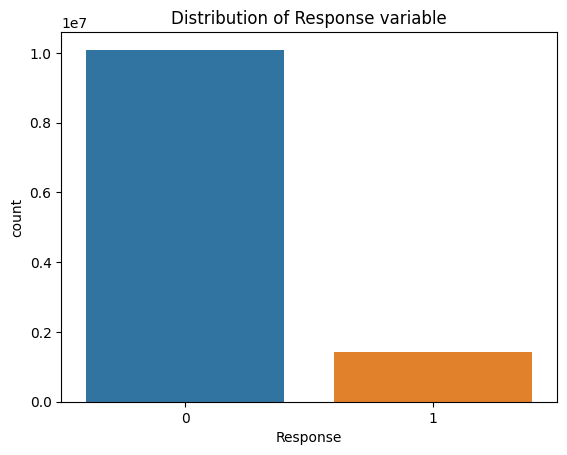

In [20]:
#Visualizing the distribution of the response variable
sns.countplot(x='Response', data=train) 
plt.title('Distribution of Response variable') 
plt.show()

#### Heavily imbalanced data of response variable  

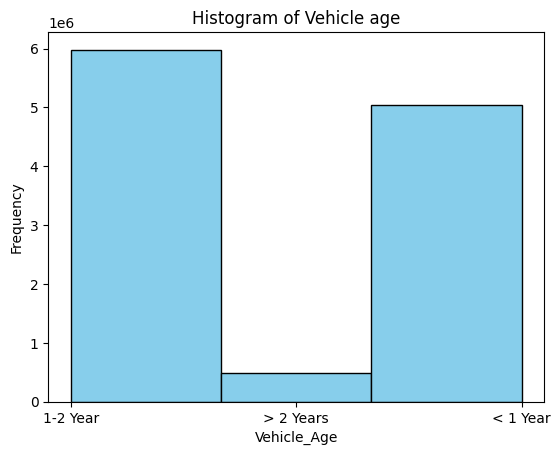

In [21]:
var=train['Vehicle_Age']
plt.hist(var, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Vehicle_Age') 
plt.ylabel('Frequency') 
plt.title('Histogram of Vehicle age') 
plt.show()

This graph shows that there is a fairly even distribution of vehicle ages, with the highest number of cars falling into the 1-2 year age range. This could indicate a recent increase in vehicle purchases or turnover within the population.

Overall, the graph shows that there is a mix of newer and older vehicles within the population, which can provide insight into consumer behavior, market trends, and the overall health of the automotive industry.

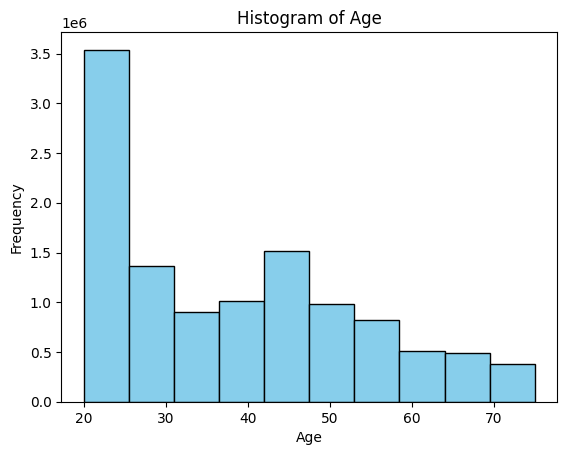

In [22]:
var=train['Age']
plt.hist(var, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.title('Histogram of Age') 
plt.show()

The histogram shows that the primary age group buying vehicles from this insurance dataset is in their early to mid twenties, with a general decline in numbers as age increases.

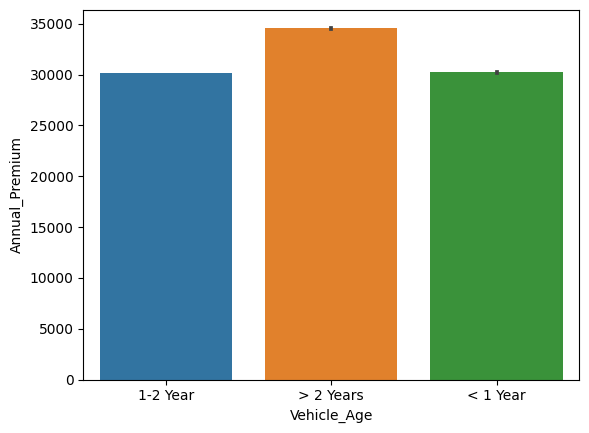

In [23]:
# Compare Vehicle_Age and Annual_Premium
sns.barplot(x='Vehicle_Age', y='Annual_Premium', data=train)
plt.show()

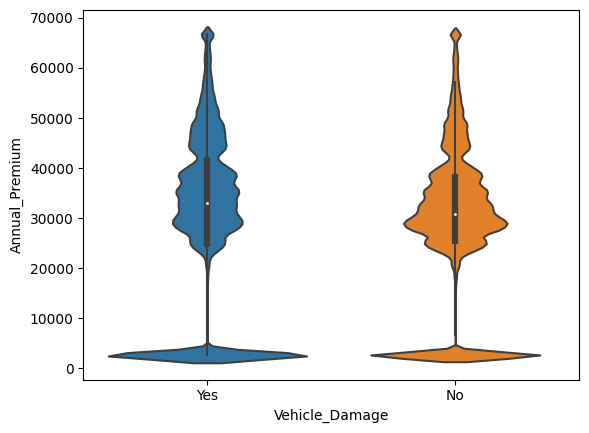

In [24]:
# Compare Vehicle_Damage and Annual_Premium
sns.violinplot(x='Vehicle_Damage', y='Annual_Premium', data=train)
plt.show()

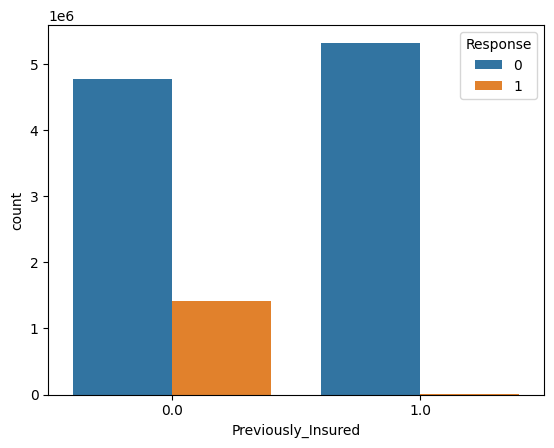

In [25]:
# Compare Previously_Insured and Response
sns.countplot(x='Previously_Insured', hue='Response', data=train)
plt.show()

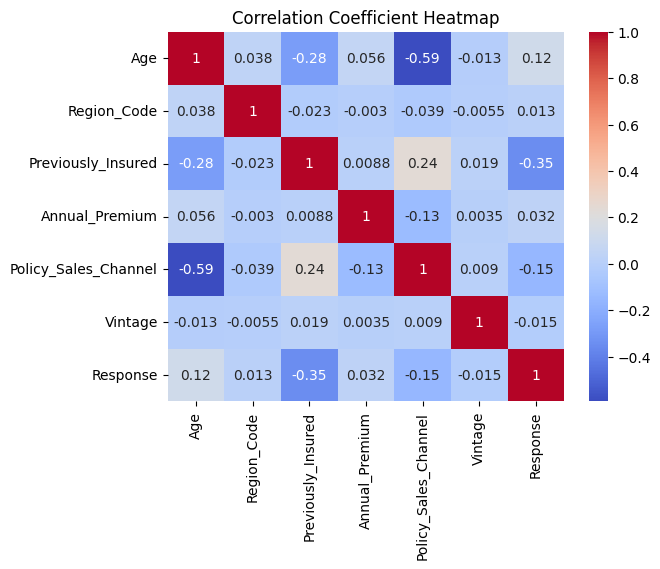

In [26]:
#calculate correlation matrix
correlation_matrix = train[['Age','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']].corr()

#plot the correlation matrix as heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Coefficient Heatmap') 
plt.show()

In [27]:

# Create separate LabelEncoders for each feature
gender_le = LabelEncoder()
vehicle_age_le = LabelEncoder()
vehicle_damage_le = LabelEncoder()

# Fit the encoders on the training data
train['Gender'] = gender_le.fit_transform(train['Gender'])
train['Vehicle_Age'] = vehicle_age_le.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = vehicle_damage_le.fit_transform(train['Vehicle_Damage'])

# Define a safe transformation function
def safe_transform(encoder, value):
    if pd.isnull(value):  # Check for NaN values
        return -1  # or any other number representing unknown categories
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        return -1  # or any other number representing unknown categories

# Apply safe_transform function for the test dataset
test['Gender'] = test['Gender'].apply(lambda x: safe_transform(gender_le, x))
test['Vehicle_Age'] = test['Vehicle_Age'].apply(lambda x: safe_transform(vehicle_age_le, x))
test['Vehicle_Damage'] = test['Vehicle_Damage'].apply(lambda x: safe_transform(vehicle_damage_le, x))

In [28]:
# Features and target variable
X = train.drop(columns=['id', 'Response'])
y = train['Response']


In [29]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Applying SMOTE to handle imbalanced classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [31]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val = scaler.transform(X_val)
# For the test data
X_test = scaler.transform(test.drop(columns=['id']))


XGBoost Model

In [32]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting the model
xgb_model.fit(X_train_res, y_train_res)

# Make predictions
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model's performance
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))

XGBoost Model Performance:
Accuracy: 0.8233376503720187
Confusion Matrix:
 [[1740686  277262]
 [ 129231  153781]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90   2017948
           1       0.36      0.54      0.43    283012

    accuracy                           0.82   2300960
   macro avg       0.64      0.70      0.66   2300960
weighted avg       0.86      0.82      0.84   2300960



LightGBM Model

In [33]:
# Initialize the LightGBM classifier
lgb_model = LGBMClassifier(random_state=42)

# Fitting the model
lgb_model.fit(X_train_res, y_train_res)

# Make predictions
y_val_pred_lgb = lgb_model.predict(X_val)

# Evaluate the model's performance
print("LightGBM Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lgb))
print(classification_report(y_val, y_val_pred_lgb))


[LightGBM] [Info] Number of positive: 8071791, number of negative: 8071791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.621127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 16143582, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Performance:
Accuracy: 0.8306654613726444
Confusion Matrix:
 [[1771099  246849]
 [ 142783  140229]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90   2017948
           1       0.36      0.50      0.42    283012

    accuracy                           0.83   2300960
   macro avg       0.64      0.69      0.66   2300960
weighted avg       0.86      0.83      0.84   2300960



In [34]:
# Use the best performing model for final predictions
final_predictions = lgb_model.predict(X_test)  

In [35]:
# Create a submission DataFrame
submission = pd.DataFrame({'id': test['id'], 'Response': final_predictions})
submission.to_csv('submission.csv', index=False)


In [36]:
# Print confirmation message
print("Submission file 'submission.csv' has been created successfully.")

Submission file 'submission.csv' has been created successfully.


Both models performed reasonably well in predicting customer responses to cross-selling offers, with the LightGBM model slightly outperforming the XGBoost model.

The best Gradient Boosting Classifier achieved an accuracy of around 73% on the test data, with a precision of 30% for positive responses and a recall of 85%. The classification report provides insights into the model's performance metrics for both classes.